In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []

In [7]:
CATEGORIES = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
DATADIR ="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

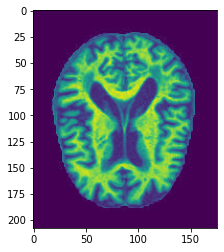

In [9]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

Naive bayes: 

In [6]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_gnb= nb.predict(x_test)
accuracy_score(y_pred_gnb,y_test)

0.5439167208848406

In [9]:
print(classification_report(y_test,y_pred_gnb, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.33      0.64      0.44       216
ModerateDemented       1.00      0.55      0.71        22
     NonDemented       0.67      0.68      0.67       768
VeryMildDemented       0.50      0.31      0.38       531

        accuracy                           0.54      1537
       macro avg       0.63      0.54      0.55      1537
    weighted avg       0.57      0.54      0.54      1537



KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
knn_3= knn.predict(x_test)
accuracy_score(knn_3,y_test)

0.9811320754716981

In [12]:
print(classification_report(y_test,knn_3, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.98      0.98      0.98       216
ModerateDemented       1.00      0.91      0.95        22
     NonDemented       0.98      0.99      0.99       768
VeryMildDemented       0.98      0.98      0.98       531

        accuracy                           0.98      1537
       macro avg       0.98      0.96      0.97      1537
    weighted avg       0.98      0.98      0.98      1537



In [15]:
import pandas as pd
import math
import seaborn as sns

cm_knn_3=confusion_matrix(knn_3,y_test)
print(cm_knn_3)

[[211   2   2   1]
 [  0  20   0   0]
 [  1   0 758  11]
 [  4   0   8 519]]


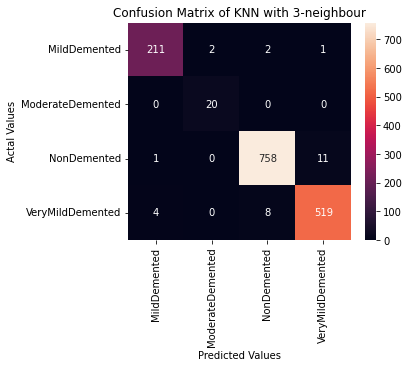

In [16]:
cm_knn_df = pd.DataFrame(cm_knn_3,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True,fmt='g')
plt.title('Confusion Matrix of KNN with 3-neighbour')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_5= knn.predict(x_test)
accuracy_score(knn_5,y_test)

0.9459986987638256

In [18]:
print(classification_report(y_test,knn_5, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.93      0.93      0.93       216
ModerateDemented       0.95      0.82      0.88        22
     NonDemented       0.95      0.97      0.96       768
VeryMildDemented       0.95      0.92      0.93       531

        accuracy                           0.95      1537
       macro avg       0.94      0.91      0.93      1537
    weighted avg       0.95      0.95      0.95      1537



[[201   3   5   7]
 [  0  18   0   1]
 [  5   0 746  34]
 [ 10   1  17 489]]


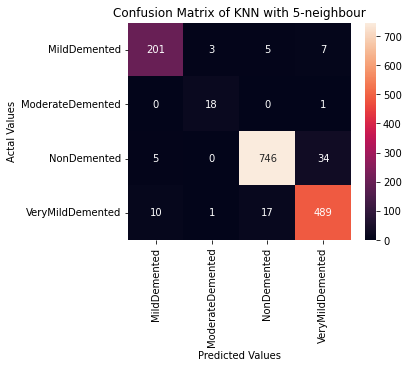

In [19]:
cm_knn_5=confusion_matrix(knn_5,y_test)
print(cm_knn_5)

cm_knn_df = pd.DataFrame(cm_knn_5,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True,fmt='g')
plt.title('Confusion Matrix of KNN with 5-neighbour')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_7= knn.predict(x_test)
accuracy_score(knn_7,y_test)

0.9193233571893299

In [23]:
print(classification_report(y_test,knn_7, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.93      0.89      0.91       216
ModerateDemented       1.00      0.64      0.78        22
     NonDemented       0.92      0.96      0.94       768
VeryMildDemented       0.91      0.88      0.89       531

        accuracy                           0.92      1537
       macro avg       0.94      0.84      0.88      1537
    weighted avg       0.92      0.92      0.92      1537



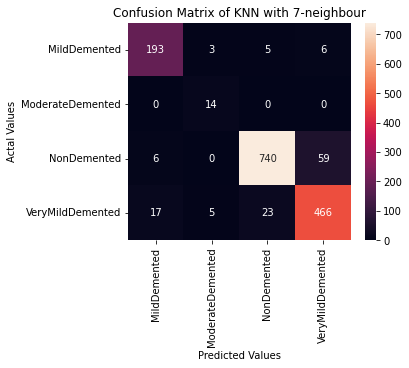

In [25]:
cm_knn_7=confusion_matrix(knn_7,y_test)


cm_knn_df = pd.DataFrame(cm_knn_7,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True,fmt='g')
plt.title('Confusion Matrix of KNN with 7-neighbour')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_10 = RandomForestClassifier(max_features=5, n_estimators=10)
rf_10.fit(x_train, y_train)
y_pred_rf= rf_10.predict(x_test)
accuracy_score(y_pred_rf,y_test)

0.7124268054651919

In [39]:
print(classification_report(y_test,y_pred_rf, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.73      0.49      0.58       216
ModerateDemented       1.00      0.05      0.09        22
     NonDemented       0.71      0.88      0.79       768
VeryMildDemented       0.70      0.59      0.64       531

        accuracy                           0.71      1537
       macro avg       0.79      0.50      0.52      1537
    weighted avg       0.72      0.71      0.70      1537



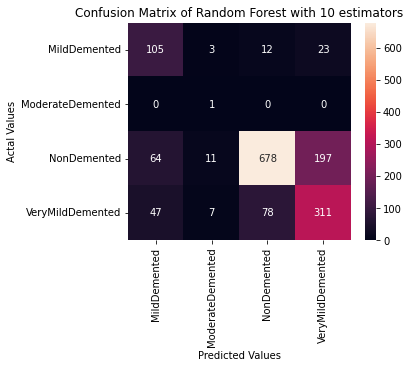

In [40]:
cm_rf_10=confusion_matrix(y_pred_rf,y_test)


cm_knn_df = pd.DataFrame(cm_rf_10,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True,fmt='g')
plt.title('Confusion Matrix of Random Forest with 10 estimators')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_100 = RandomForestClassifier(max_features=50, n_estimators=100)
rf_100.fit(x_train, y_train)
y_pred_rbf= rf_100.predict(x_test)
accuracy_score(y_pred_rbf,y_test)

0.8789850357839948

In [43]:
print(classification_report(y_test,y_pred_rbf, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.99      0.75      0.86       216
ModerateDemented       1.00      0.14      0.24        22
     NonDemented       0.88      0.96      0.92       768
VeryMildDemented       0.85      0.84      0.84       531

        accuracy                           0.88      1537
       macro avg       0.93      0.67      0.71      1537
    weighted avg       0.88      0.88      0.87      1537



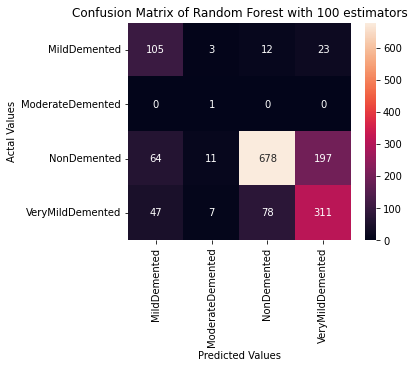

In [44]:
cm_rf_100=confusion_matrix(y_pred_rbf,y_test)


cm_rf_df = pd.DataFrame(cm_rf_100,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True,fmt='g')
plt.title('Confusion Matrix of Random Forest with 100 estimators')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [0.1,1,10,100], 'kernel': ['linear']},
 ]
svc = svm.SVC(probability=True)
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=10.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=10.5min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=10.9min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=10.6min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.969 total time=10.8min
[CV 1/5] END ................C=1, kernel=linear;, score=0.950 total time=10.5min
[CV 2/5] END ................C=1, kernel=linear;, score=0.955 total time=10.6min
[CV 3/5] END ................C=1, kernel=linear;, score=0.979 total time=10.7min
[CV 4/5] END ................C=1, kernel=linear;, score=0.965 total time=10.5min
[CV 5/5] END ................C=1, kernel=linear;, score=0.969 total time=10.8min
[CV 1/5] END ...............C=10, kernel=linear;, score=0.950 total time=10.8min
[CV 2/5] END ...............C=10, kernel=linear;,